<a href="https://colab.research.google.com/github/ipavlopoulos/toxic_spans/blob/master/ToxicSpans_SemEval21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download the data and the code

In [3]:
from ast import literal_eval
import pandas as pd
import random

In [1]:
!git clone https://github.com/ipavlopoulos/toxic_spans.git
from toxic_spans.evaluation.semeval2021 import f1

Cloning into 'toxic_spans'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (154/154), done.
remote: Total 205 (delta 95), reused 145 (delta 49), pack-reused 0
Receiving objects: 100% (205/205), 181.00 KiB | 5.32 MiB/s, done.
Resolving deltas: 100% (95/95), done.


In [4]:
tsd = pd.read_csv("toxic_spans/data/tsd_trial.csv") 
tsd.spans = tsd.spans.apply(literal_eval)
tsd.head(1)

,spans,text
0,"[15, 16, 17, 18, 19, 27, 28, 29, 30, 31]",Because he's a moron and a bigot. It's not any...


### Run a random baseline
* Returns random offsets as toxic per text

In [16]:
# make an example with a taboo word
taboo_word = "fucking"
template = f"This is a {taboo_word} example."

# build a random baseline (yields offsets at random)
random_baseline = lambda text: [i for i, char in enumerate(text) if random.random()>0.5]
predictions = random_baseline(template)

# find the ground truth indices and print
gold = list(range(template.index(taboo_word), template.index(taboo_word)+len(taboo_word)))
print(f"Gold\t\t: {gold}")
print(f"Predicted\t: {predictions}")

Gold		: [10, 11, 12, 13, 14, 15, 16]
Predicted	: [1, 5, 6, 9, 10, 11, 13, 16, 17, 21, 24]


In [17]:
tsd["random_predictions"] = tsd.text.apply(random_baseline)
tsd["f1_scores"] = tsd.apply(lambda row: f1(row.random_predictions, row.spans), axis=1)
tsd.head()

,spans,text,random_predictions,f1_scores
0,"[15, 16, 17, 18, 19, 27, 28, 29, 30, 31]",Because he's a moron and a bigot. It's not any...,"[0, 2, 4, 7, 8, 9, 11, 12, 15, 18, 22, 24, 27,...",0.222222
1,"[29, 30, 31, 32, 33, 34]",How about we stop protecting idiots and let na...,"[1, 2, 5, 6, 8, 9, 11, 13, 14, 17, 18, 19, 20,...",0.085714
2,"[166, 167, 168, 169, 170, 171]","If people were smart, they would Boycott th...","[1, 2, 7, 9, 10, 11, 13, 15, 16, 18, 19, 20, 2...",0.037383
3,"[87, 88, 89, 90, 91, 92]",Trump Claimed that Russia will never invade th...,"[0, 1, 2, 5, 19, 20, 21, 22, 28, 30, 33, 38, 4...",0.153846
4,[],As long as your willing to pay a lot more for ...,"[0, 2, 10, 16, 17, 21, 23, 30, 31, 33, 34, 36,...",0.000000


F1 = 0.17 ± 0.01


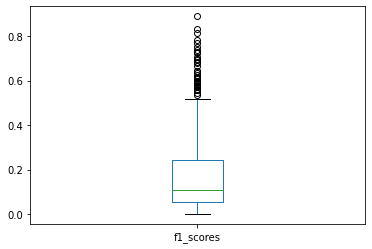

In [18]:
from scipy.stats import sem
_ = tsd.f1_scores.plot(kind="box")
print (f"F1 = {tsd.f1_scores.mean():.2f} ± {sem(tsd.f1_scores):.2f}")

### Prepare the text file with the scores
* Name it as `spans-pred.txt`.
* Align the scores with the rows.

In [ ]:
# make sure that the ids match the ones of the scores
predictions = tsd.random_predictions.to_list()
ids = tsd.index.to_list()

# write in a prediction file named "spans-pred.txt"
with open("spans-pred.txt", "w") as out:
  for uid, text_scores in zip(ids, predictions):
    out.write(f"{str(uid)}\t{str(text_scores)}\n")

! head spans-pred.txt

0	[0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 14, 15, 18, 21, 22, 24, 25, 28, 30, 31, 35, 36, 39, 40, 41, 43, 44, 45, 47, 48, 49, 50, 52, 57, 58, 61, 63, 68, 69, 70, 71, 72]
1	[2, 3, 5, 7, 8, 10, 11, 13, 17, 18, 19, 20, 21, 22, 25, 27, 28, 36, 37, 38, 39, 41, 44, 45, 46, 47, 48, 50, 51, 54, 55, 57, 58, 59, 65, 67, 68, 70, 71, 72, 75, 77, 79, 80, 83, 84, 86, 87, 88, 90, 92, 94, 95, 96, 97, 98, 104, 107, 108, 109, 110, 114, 115, 116, 117, 118, 119, 120, 124, 125, 126, 127, 132, 133, 134, 135, 136]
2	[3, 4, 7, 9, 10, 12, 17, 19, 23, 25, 28, 29, 30, 31, 32, 35, 36, 38, 44, 46, 47, 48, 50, 51, 52, 53, 56, 57, 59, 60, 64, 65, 66, 67, 68, 69, 74, 76, 78, 79, 80, 81, 83, 84, 85, 87, 88, 90, 92, 93, 94, 95, 96, 99, 100, 106, 108, 109, 111, 116, 117, 118, 119, 120, 121, 122, 123, 126, 133, 134, 135, 136, 138, 140, 142, 143, 144, 147, 155, 156, 158, 159, 160, 161, 164, 169, 170, 172, 173, 175, 176, 178, 179, 180, 183, 184, 185, 186]
3	[0, 2, 4, 5, 6, 7, 10, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 28, 30

### Zip the predictions
* Take extra care to verify that only the predictions text file is included. 
* The text file should **not** be within any directory. 
* No other file should be included; the zip should only contain the txt file.


In [ ]:
! zip -r random_predictions.zip ./spans-pred.* 

  adding: spans-pred.txt (deflated 77%)


###### Check by unziping it: only a `spans-pred.txt` file should be created

In [ ]:
! rm spans-pred.txt
! unzip random_predictions.zip

Archive:  random_predictions.zip
  inflating: spans-pred.txt          


### Download the zip and submit it to be assessed

In [ ]:
from google.colab import files
files.download("random_predictions.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### When the submission is finished click the `Download output from scoring step`
* The submission may take a while, so avoid late submissions.
* Download the output_file.zip and see your score in the respective file.